**Veri Seti Hakkında**
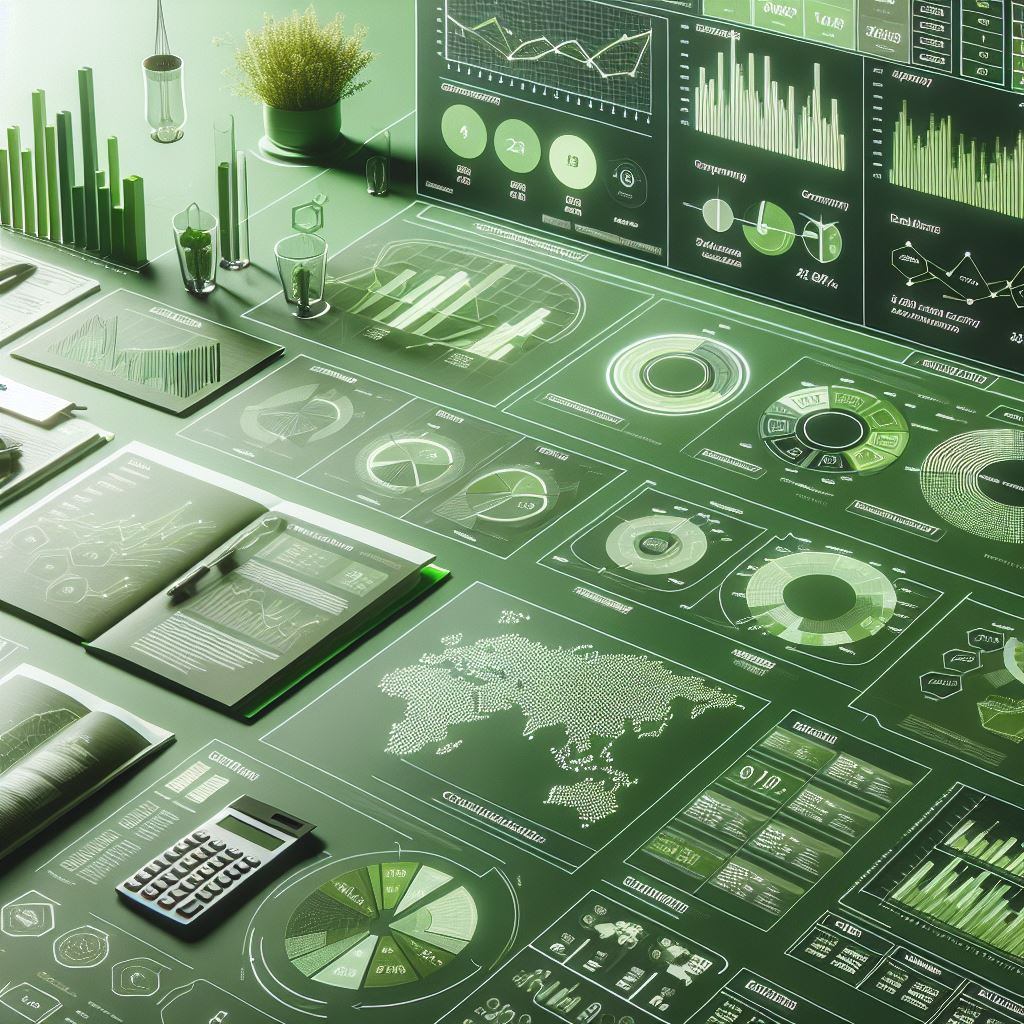**Tanım:**:
Veri seti, ürün satın alımlarının çeşitli yönlerini, müşteri ayrıntılarını ve sipariş özelliklerini yakalayan, çevrimiçi satış işlemlerine ilişkin anonimleştirilmiş verileri içermektedi

**FaturaNo**: Her satış işlemi (fatura) için benzersiz bir tanımlayıcı.
**Stok Kodu**:u	Ürünün stok tutma birimini (SKU) temsil eden kod
ı**Miktar**:tar	İşlemde satılan ürünün birim sayı
s**FaturaTarihi**:rihi	Satışın kaydedildiği tarih ve s
a**BirimFiyat**:Fiyat	Ürünün işlem para birimi cinsinden birim fi
y**Müşteri Kimliği**: mliği	Her müşteri için benzersiz bir tanıml
a**Ülke**:.
Ülke	Müşterinin 
ü**İndirim**:
İndirim	Varsa işleme uygulanan 
i**Ödeme yöntemi**:e yöntemi	İşlemde kullanılan ödeme yöntemi (Örneğin; PayPal, Banka H
a**Kargo Maliyeti**:o Maliyeti	İşlem için nakli
y**Kategori**:.
Kategori	Ürünün ait olduğu kategori (örneğin Elektron
i**Satış Kanalı**:Satış Kanalı	Satışın yapıldığı kanal (örneğin, Online, 
M**Dönüş Durumu**:
Dönüş Durumu	Ürünün iade edilip edilmediğ
i**Sevkiyat Sağlayıcısı**:at Sağlayıcısı	Siparişin teslimatından sorumlu sağlayıcı (örneği
n**Depo Konumu**:x).
DepoKonumu	Siparişin karşılandı
ğ**Sipariş Önceliği**:
SiparişÖnceliği	Siparişin öncelik seviyesi (örneğin Yüksek, Orta, Düşük).a, Düşük).r.der (e.g., High, Medium, Low).

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import random

**(EDA - Exploratory Data Analysis)**

In [2]:
data=pd.read_csv("/kaggle/input/online-sales-dataset/online_sales_dataset.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [3]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [4]:
print(data.info())
print(data.shape)
print(data.describe())
print(data.columns)
data.columns = data.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [5]:
data.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

**Veri Temizleme ve Ön İşleme**

In [6]:
df = pd.DataFrame(data)
print("Orijinal DataFrame:")
print(df)

Orijinal DataFrame:
       InvoiceNo StockCode   Description  Quantity       InvoiceDate  \
0         221958  SKU_1964     White Mug        38  2020-01-01 00:00   
1         771155  SKU_1241     White Mug        18  2020-01-01 01:00   
2         231932  SKU_1501    Headphones        49  2020-01-01 02:00   
3         465838  SKU_1760     Desk Lamp        14  2020-01-01 03:00   
4         359178  SKU_1386     USB Cable       -30  2020-01-01 04:00   
...          ...       ...           ...       ...               ...   
49777     354083  SKU_1562      Blue Pen        25  2025-09-05 01:00   
49778     296698  SKU_1930     USB Cable         7  2025-09-05 02:00   
49779     177622  SKU_1766  Office Chair        43  2025-09-05 03:00   
49780     701213  SKU_1602      Notebook        48  2025-09-05 04:00   
49781     772215  SKU_1832     White Mug        30  2025-09-05 05:00   

       UnitPrice  CustomerID         Country  Discount  PaymentMethod  \
0           1.71     37039.0       Austral

In [7]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
    return df_missing

In [8]:
# DataFrame'e %2 oranında eksik değer ekle
df_with_missing = add_random_missing_values(df, missing_rate=0.02)

print("\nEksik Değerler Eklenmiş DataFrame:")
print(df_with_missing)


Eksik Değerler Eklenmiş DataFrame:
       InvoiceNo StockCode   Description  Quantity       InvoiceDate  \
0       221958.0  SKU_1964     White Mug      38.0  2020-01-01 00:00   
1       771155.0  SKU_1241     White Mug      18.0  2020-01-01 01:00   
2       231932.0  SKU_1501    Headphones      49.0  2020-01-01 02:00   
3       465838.0  SKU_1760     Desk Lamp      14.0  2020-01-01 03:00   
4       359178.0  SKU_1386     USB Cable     -30.0  2020-01-01 04:00   
...          ...       ...           ...       ...               ...   
49777   354083.0  SKU_1562      Blue Pen      25.0  2025-09-05 01:00   
49778   296698.0  SKU_1930     USB Cable       7.0  2025-09-05 02:00   
49779   177622.0  SKU_1766  Office Chair      43.0  2025-09-05 03:00   
49780   701213.0  SKU_1602      Notebook      48.0  2025-09-05 04:00   
49781   772215.0  SKU_1832     White Mug      30.0  2025-09-05 05:00   

       UnitPrice  CustomerID         Country  Discount  PaymentMethod  \
0           1.71     37039

In [9]:
print(df_with_missing.isnull().sum())
print(df_with_missing.info())
print(df_with_missing.shape)
print(df_with_missing.describe())
print(df_with_missing.columns)
df_with_missing.columns = (df_with_missing.columns.str.strip())

InvoiceNo             914
StockCode            1049
Description           957
Quantity              909
InvoiceDate           972
UnitPrice             961
CustomerID           5879
Country               977
Discount              965
PaymentMethod        1000
ShippingCost         3469
Category             1010
SalesChannel         1007
ReturnStatus         1013
ShipmentProvider      991
WarehouseLocation    4397
OrderPriority        1022
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          48868 non-null  float64
 1   StockCode          48733 non-null  object 
 2   Description        48825 non-null  object 
 3   Quantity           48873 non-null  float64
 4   InvoiceDate        48810 non-null  object 
 5   UnitPrice          48821 non-null  float64
 6   CustomerID         43903 non-null  float64
 7  

In [10]:
# Sayısal sütunlar için eksik değerleri ortalama ile doldur
numeric_columns = df_with_missing.select_dtypes(include=['int64', 'float64']).columns
df_with_missing[numeric_columns] = df_with_missing[numeric_columns].fillna(df_with_missing[numeric_columns].mean())

# Kategorik sütunlar için eksik değerleri mod ile doldur
categorical_columns = df_with_missing.select_dtypes(include=['object']).columns
df_with_missing[categorical_columns] = df_with_missing[categorical_columns].fillna(df_with_missing[categorical_columns].mode().iloc[0])

# Eksik veriler temizlendikten sonra tekrar kontrol edelim
df_missing_after = df_with_missing.isnull().sum().sum()
df = df_with_missing
print(df)

       InvoiceNo StockCode   Description  Quantity       InvoiceDate  \
0       221958.0  SKU_1964     White Mug      38.0  2020-01-01 00:00   
1       771155.0  SKU_1241     White Mug      18.0  2020-01-01 01:00   
2       231932.0  SKU_1501    Headphones      49.0  2020-01-01 02:00   
3       465838.0  SKU_1760     Desk Lamp      14.0  2020-01-01 03:00   
4       359178.0  SKU_1386     USB Cable     -30.0  2020-01-01 04:00   
...          ...       ...           ...       ...               ...   
49777   354083.0  SKU_1562      Blue Pen      25.0  2025-09-05 01:00   
49778   296698.0  SKU_1930     USB Cable       7.0  2025-09-05 02:00   
49779   177622.0  SKU_1766  Office Chair      43.0  2025-09-05 03:00   
49780   701213.0  SKU_1602      Notebook      48.0  2025-09-05 04:00   
49781   772215.0  SKU_1832     White Mug      30.0  2025-09-05 05:00   

       UnitPrice    CustomerID         Country  Discount  PaymentMethod  \
0           1.71  37039.000000       Australia  0.470000  Ba

In [11]:
print(df.isnull().sum())
print(df.describe())


InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64
           InvoiceNo      Quantity     UnitPrice    CustomerID      Discount  \
count   49782.000000  49782.000000  49782.000000  49782.000000  49782.000000   
mean   550586.193092     22.410001     47.545642  55020.448694      0.275700   
std    258229.004765     17.727079     33.159185  24330.400109      0.227683   
min    100005.000000    -50.000000    -99.980000  10001.000000      0.000000   
25%    328697.750000     11.000000     24.080000  35699.250000      0.130000   
50%    550586.193092     23.000000     47.970000  55020.448694      0.260000   
75%    771514.750000     36.000000  

**İstatistiksel Analizler & Görselleştirme**

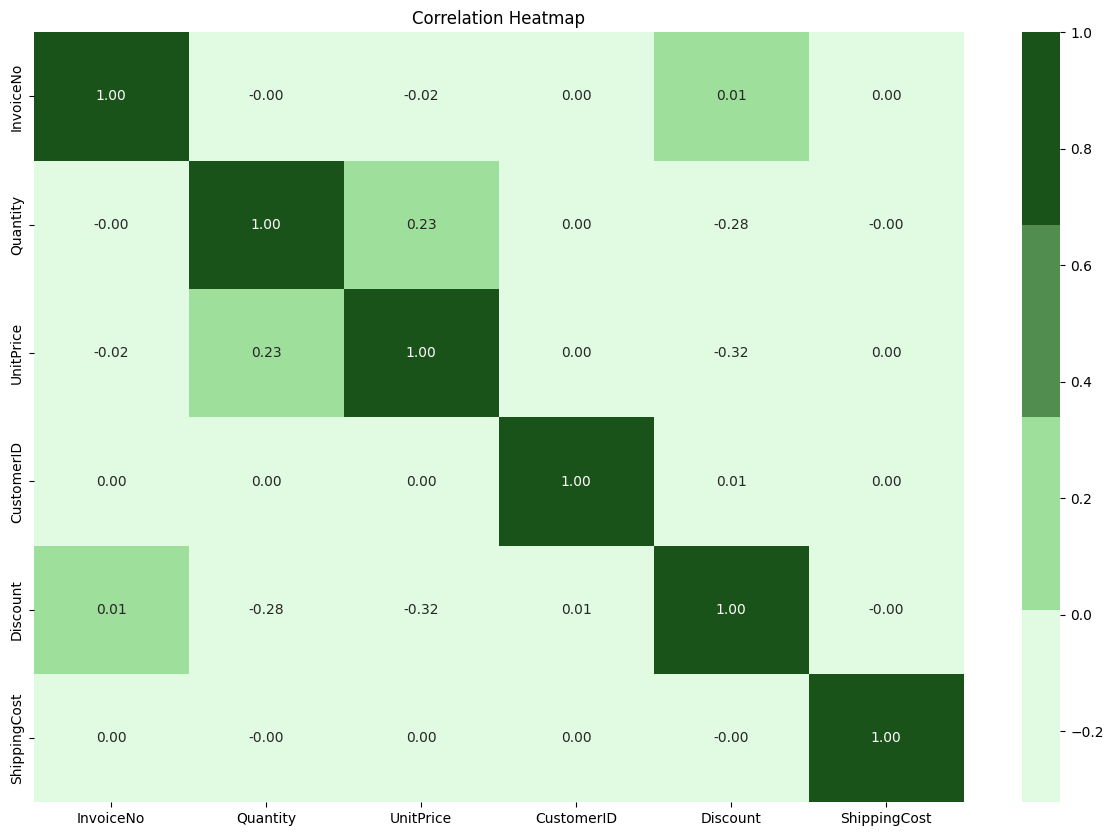

In [12]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f', cmap=["#E0FBE2","#9EDF9C","#508D4E","#1A5319"])
plt.title('Correlation Heatmap')
plt.show()


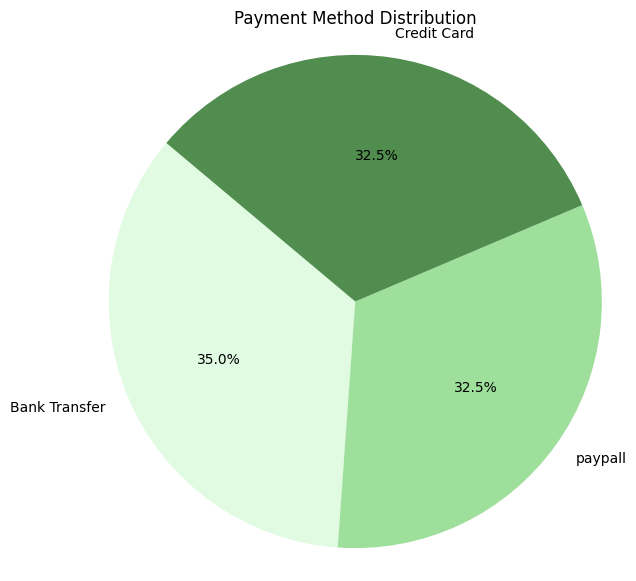

In [13]:
payment_counts = df['PaymentMethod'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#E0FBE2","#9EDF9C","#508D4E","#1A5319"])
plt.title('Payment Method Distribution')
plt.axis('equal')  

plt.show()

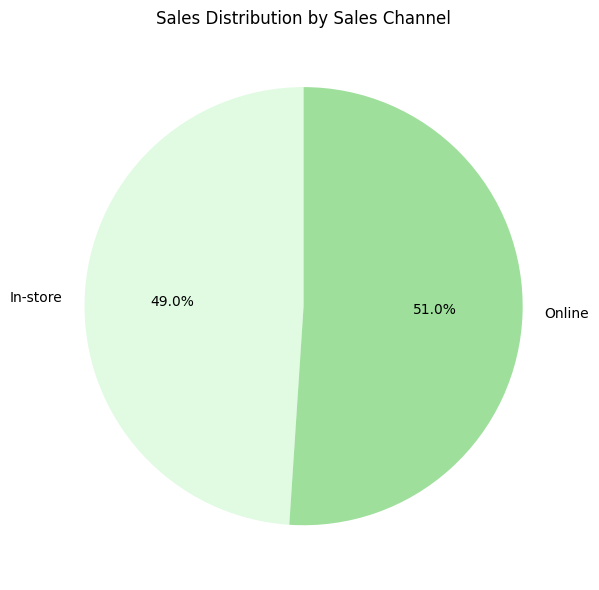

In [14]:
df['Sales'] = (df['UnitPrice'] * df['Quantity'] * (1 - df['Discount'])) + df['ShippingCost']
df_totalsales=df['Sales'].sum()
df_totalsales.round(1)

sales_by_channel = df.groupby('SalesChannel')['Sales'].sum()

plt.figure(figsize=(8, 6))
plt.pie(sales_by_channel, labels=sales_by_channel.index, autopct='%1.1f%%', startangle=90, colors=["#E0FBE2","#9EDF9C","#508D4E","#1A5319"])

plt.title('Sales Distribution by Sales Channel')

plt.tight_layout()
plt.show()

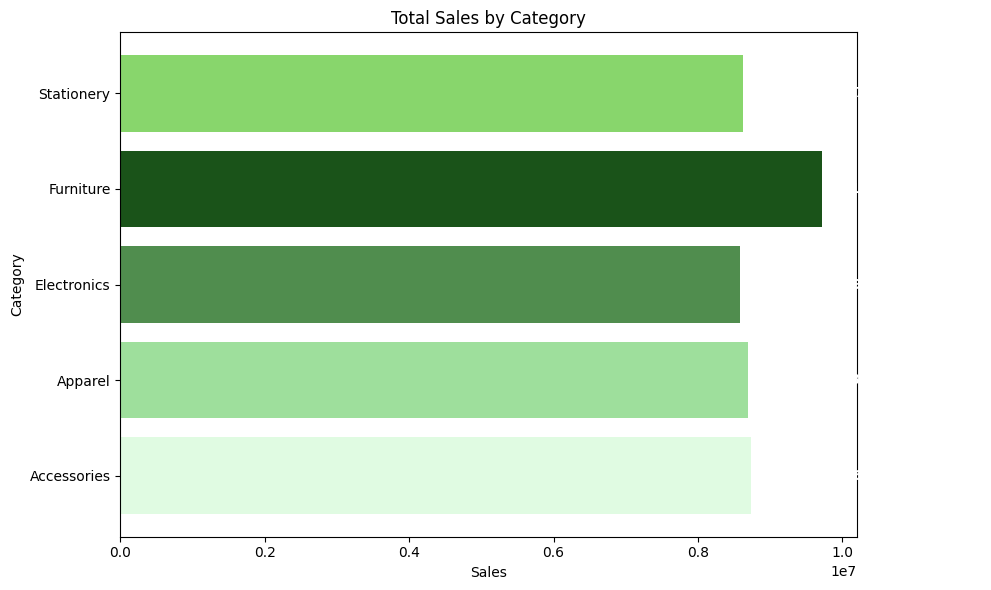

In [15]:
grouped_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.barh(grouped_sales['Category'], grouped_sales['Sales'], color=["#E0FBE2","#9EDF9C","#508D4E","#1A5319",'#88D66C'])

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (i.e., sales value)
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', ha='left', color='white', fontweight='bold')

plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.tight_layout()

plt.show()

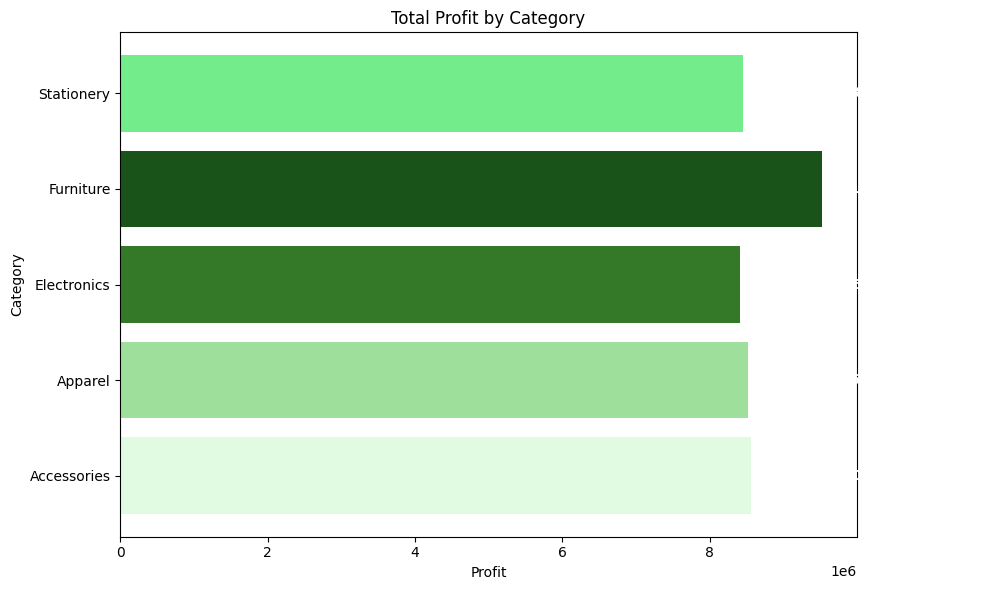

In [16]:
df['Netprofit'] = df['Sales'] - df['ShippingCost']
df_profit=df['Netprofit'].sum()

grouped_profit = df.groupby('Category')['Netprofit'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.barh(grouped_profit['Category'], grouped_profit['Netprofit'], color=["#E0FBE2","#9EDF9C","#347928","#1A5319",'#73EC8B'])

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (i.e., profit value)
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', ha='left', color='white', fontweight='bold')

plt.title('Total Profit by Category')
plt.xlabel('Profit')
plt.ylabel('Category')
plt.tight_layout()

plt.show()

                   Sales
Month_name              
April       3.825341e+06
August      3.908881e+06
December    3.220666e+06
February    3.520773e+06
January     4.734648e+06
July        3.888782e+06
June        3.734531e+06
March       3.910935e+06
May         3.852441e+06
November    3.192759e+06
October     3.265444e+06
September   3.290171e+06


<Axes: xlabel='Year', ylabel='Sales'>

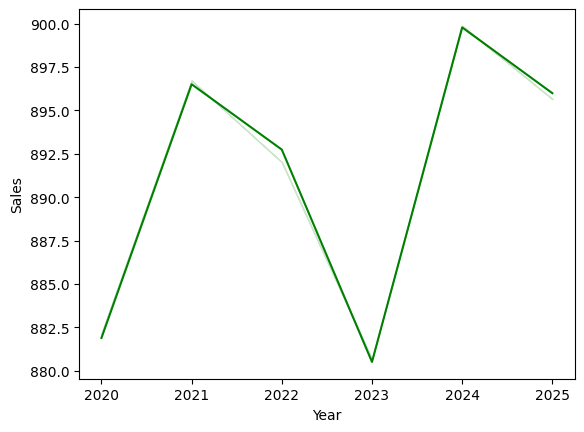

In [17]:
# Dealing with invoice date columns
df["Year"]=pd.to_datetime(df["InvoiceDate"]).dt.year
df["Month"]=pd.to_datetime(df["InvoiceDate"]).dt.month
df["Month_name"]=pd.to_datetime(df["InvoiceDate"]).dt.month_name()
df["Day"]=pd.to_datetime(df["InvoiceDate"]).dt.day
df["Day_name"]=pd.to_datetime(df["InvoiceDate"]).dt.day_name()
df["Quater"]=pd.to_datetime(df["InvoiceDate"]).dt.quarter

print(df.groupby(["Month_name"])[["Sales"]].sum()) 
sns.lineplot(x=df["Year"],y=df["Sales"],ci=False,color="green")

                   Sales
Month_name              
April       3.825341e+06
August      3.908881e+06
December    3.220666e+06
February    3.520773e+06
January     4.734648e+06
July        3.888782e+06
June        3.734531e+06
March       3.910935e+06
May         3.852441e+06
November    3.192759e+06
October     3.265444e+06
September   3.290171e+06


<Axes: xlabel='Month_name'>

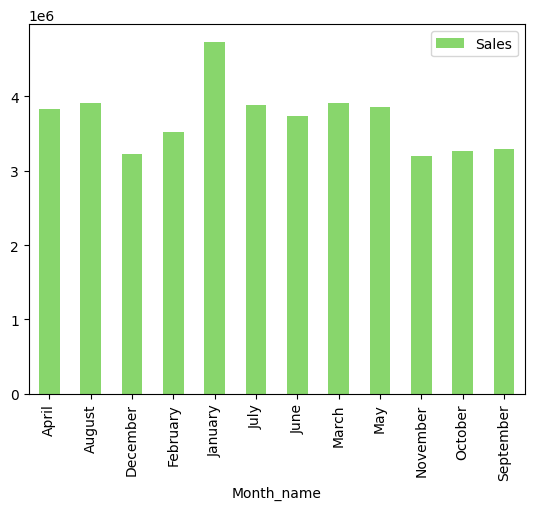

In [18]:
print(df.groupby(["Month_name"])[["Sales"]].sum()) 
df.groupby(["Month_name"])[["Sales"]].sum().plot(kind="bar",color=['#88D66C'])

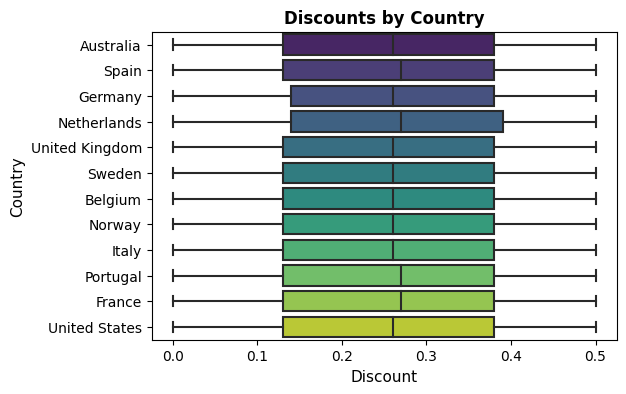

In [19]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x="Discount", y="Country",palette="viridis", showfliers=False)

plt.title("Discounts by Country", fontsize=12, weight='bold')

plt.xlabel("Discount", fontsize=11)

plt.ylabel("Country", fontsize=11)

plt.show()

**Makine öğrenmesi**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Prepare the data
df['ReturnStatus'] = df['ReturnStatus'].apply(lambda x: 1 if x == 'Returned' else 0)
features = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
X = df[features].fillna(0)
y = df['ReturnStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13535
           1       0.00      0.00      0.00      1400

    accuracy                           0.91     14935
   macro avg       0.45      0.50      0.48     14935
weighted avg       0.82      0.91      0.86     14935



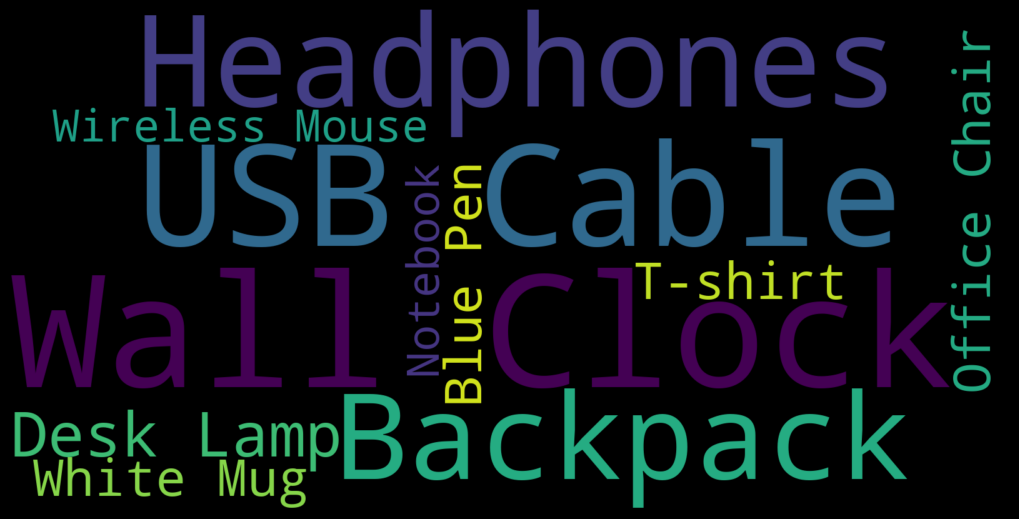

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Description"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()